# ECBM E4040 - Assignment 2 - Task 4: Data Augmentation

One important factor in neural network training is the size of the traininig set. Since it is often not possible to get a clean and large enough dataset for training, one way to improve the network's robustness and generalization ability is to create 'fake' data by injecting random noise or doing random transformations on the available data. A technique which implements this strategy is called __data augmentation__, and has shown to be very effective.

One thing to remember, when you augment your data, is to never change the correct label of a sample. For example, for hand-written digit dataset, flipping a letter 'b' ends up looking like a letter 'd', but you must keep the label for 'b'. So please choose the best augmentation methods for your dataset.

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Import modules
from __future__ import print_function
import numpy as np
from ecbm4040.cifar_utils import load_data
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Data

In [3]:
X_train, y_train, X_test, y_test = load_data()

num_train = 49000 
num_val = 1000
num_test = 10000
num_dev = 128

# The development set is used for augmentation practices.
mask = np.random.choice(num_train, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

# Seperate Training set into a training set and a validation set
X_val = X_train[num_train:]
y_val = y_train[num_train:]
X_train = X_train[:num_train]
y_train = y_train[:num_train]



# Preprocessing: subtract the mean value across every dimension for training data, and reshape it to be RGB size
mean_image = np.mean(X_train, axis=0)
X_train = X_train.astype(np.float32) - mean_image.astype(np.float32)
X_val = X_val.astype(np.float32) - mean_image




print(X_train.shape, X_val.shape, X_test.shape, X_dev.shape)

./data/cifar-10-python.tar.gz already exists. Begin extracting...
(49000, 3072) (1000, 3072) (10000, 3072) (128, 3072)


## Part 1: Visualization

### Visualize some original images

<span style="color:red">__TODO:__</span> Use Pyplot to draw any 16 samples from the __development set__ in a 4-by-4 grid.

__Hint__: The original data is vectorized, you need to find a way to reshape it into 32*32 RGB image.

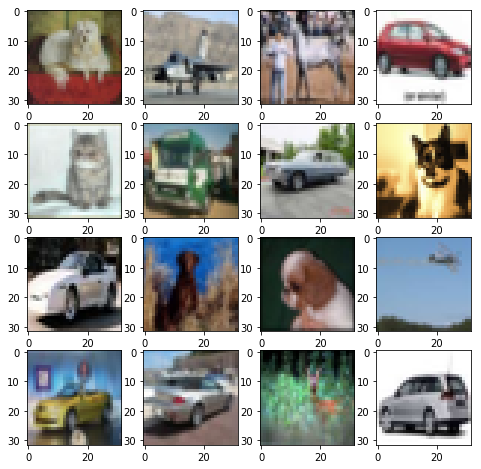

In [4]:
r = 4
f, axarr = plt.subplots(r, r, figsize=(8,8))

for i in range(r):
    for j in range(r):

        img_flat = X_dev[np.random.choice(X_dev.shape[0],1),:].flatten()
        img_R = img_flat[0:1024].reshape((32, 32))
        img_G = img_flat[1024:2048].reshape((32, 32))
        img_B = img_flat[2048:3072].reshape((32, 32))
        img = np.dstack((img_R, img_G, img_B))
        axarr[i][j].imshow(img)


## Part 2: Automatic batch generator

We want you to create an automatic image generator that does several kinds of data augmentations, and produces a batch of data consisting of random samples every time you call it. 

<span style="color:red">__TODO__:</span> Finish the functions of class __ImageGenerator__ in __ecbm4040/image_generator.py__. The code is fully commented with instructions.

__Hint__: The python keywords __yield__ and __next__ can help you do some tricks.

In [5]:
from ecbm4040.image_generator import ImageGenerator

<span style="color:red">__TODO__:</span> Create an ImageGenerator object using the __development set__, and use __show__ function to plot the top 16 original images.

In [6]:
def reshapeImg(X,idx):
    img_flat = X[idx,:].flatten()
    img_R = img_flat[0:1024].reshape((32, 32)) / 255
    img_G = img_flat[1024:2048].reshape((32, 32)) / 255
    img_B = img_flat[2048:3072].reshape((32, 32)) /255
    img = np.dstack((img_R, img_G, img_B))
    return img

def reshapeArray(X):
    container = np.ndarray((X.shape[0],32,32,3))
    for n in range(X.shape[0]):
        container[n] = reshapeImg(X,n)

    return container



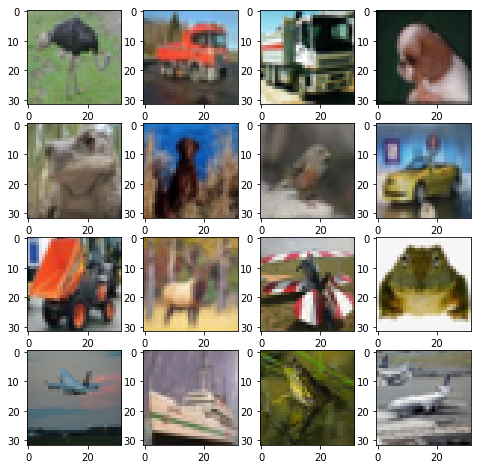

In [7]:
dev_gen = ImageGenerator(reshapeArray(X_dev) , y_dev)
dev_gen.show()

### Translation

<span style="color:red">__TODO:__</span> Translate the original __development set__ by several pixels in both directions, and plot the top 16 images like you just did.

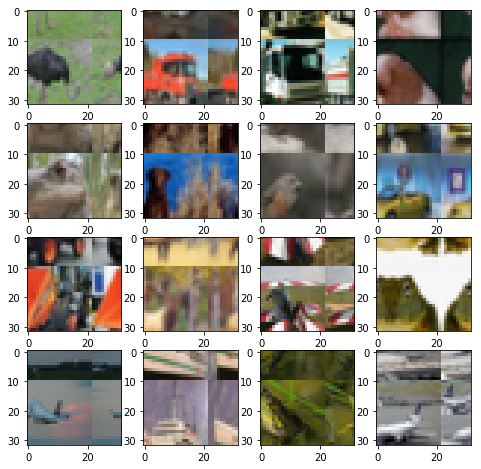

In [8]:
del dev_gen
dev_gen = ImageGenerator(reshapeArray(X_dev), y_dev)

dev_gen.translate(shift_height=10, shift_width= -10)

dev_gen.show()

### Rotation

<span style="color:red">__TODO:__</span> Rotate the original __development set__ by several degrees, and plot the top 16 images like you just did. 

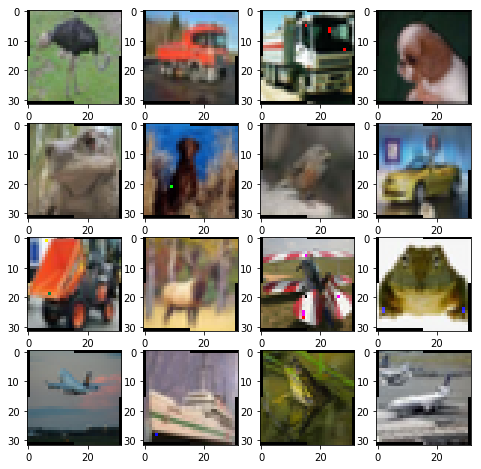

In [9]:
# YOUR CODE HERE
del dev_gen
dev_gen = ImageGenerator(reshapeArray(X_dev), y_dev)

dev_gen.rotate(angle=-1)

dev_gen.show()

### Flipping (horizontal and vertical)

<span style="color:red">__TODO:__</span> Flip the original __development set__ as you like (horizontal, vertical, or both), and plot the top 16 images like you just did. 

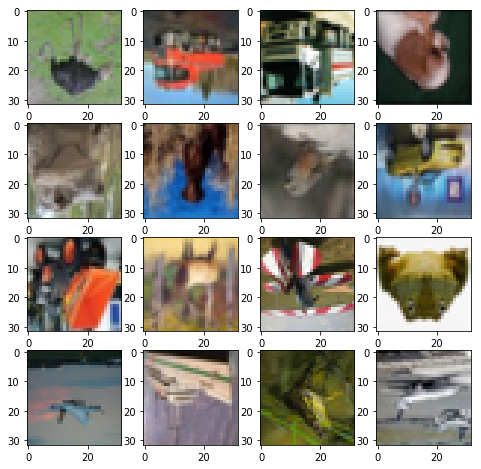

In [10]:
# YOUR CODE HERE
del dev_gen
dev_gen = ImageGenerator(reshapeArray(X_dev), y_dev)

dev_gen.flip(mode= 'hv')

dev_gen.show()

### Add Noise

<span style="color:red">__TODO:__</span> Inject random noise into the original __development set__, and plot the top 16 images like you just did.

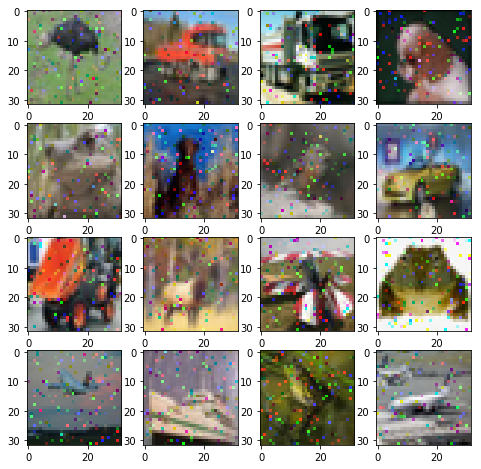

In [11]:
# YOUR CODE HERE
del dev_gen
dev_gen = ImageGenerator(reshapeArray(X_dev), y_dev)

#normally distributed 
dev_gen.add_noise(portion=.05, amplitude=.5)
dev_gen.show()

## Part 3: Data Augmentation + LeNet

<span style="color:red">__TODO__:</span> Now that you have your own data generator. At the end of __ecbm4040/neuralnets/cnn.py__, there is a not-implemented function __my_training_task4()__. Copy the __my_training()__ function above and modify it so that it uses your data generator for training. Train the network again - whether you see and improvement or a drop, record it and analyze why.

In [19]:
## Reloading the data so it's clean and unaltered. 

X_train, y_train, X_test, y_test = load_data()

num_train = 49000 
num_val = 1000
num_test = 10000
num_dev = 128

# The development set is used for augmentation practices.
mask = np.random.choice(num_train, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

# Seperate Training set into a training set and a validation set
X_val = X_train[num_train:]
y_val = y_train[num_train:]
X_train = X_train[:num_train]
y_train = y_train[:num_train]



# Preprocessing: subtract the mean value across every dimension for training data, and reshape it to be RGB size
mean_image = np.mean(X_train, axis=0)
X_train = X_train.astype(np.float32) - mean_image.astype(np.float32)
X_val = X_val.astype(np.float32) - mean_image


print(X_train.shape, X_val.shape, X_test.shape, X_dev.shape)

./data/cifar-10-python.tar.gz already exists. Begin extracting...
(49000, 3072) (1000, 3072) (10000, 3072) (128, 3072)


In [20]:
## Have to reshape with helper function in order for RGB to be correct.
X_train     = reshapeArray(X_train)
X_val       = reshapeArray(X_val)
Train_X_Gen = ImageGenerator(X_train, y_train)



In [14]:
## First I'm reloading a model from Task3 that performed well to make sure my generator functions as intended.

from ecbm4040.neuralnets.cnn import my_training_task4
import tensorflow as tf

tf.reset_default_graph()
result , cache = my_training_task4(Train_X_Gen, X_val, y_val, 
             conv_featmap=[10],
             fc_units=[84, 84],
             conv_kernel_size=[5],
             pooling_size=[2],
             l2_norm= .0001,
             seed=235,
             use_adam = True,
             learning_rate= .001,
             epoch=20,
             batch_size=245,
             verbose=False,
             pre_trained_model= 'lenet_1509670317')  # using a relatively successful model from task 3



Building my LeNet. Parameters: 
conv_featmap=[10]
fc_units=[84, 84]
conv_kernel_size=[5]
pooling_size=[2]
l2_norm=0.0001
seed=235
learning_rate=0.001
number of batches for training: 200
Load the model from: lenet_1509670317
INFO:tensorflow:Restoring parameters from model/lenet_1509670317
epoch 1 
Best validation accuracy! iteration:100 accuracy: 45.2%
Best validation accuracy! iteration:200 accuracy: 52.4%
epoch 2 
Best validation accuracy! iteration:300 accuracy: 55.8%
Best validation accuracy! iteration:400 accuracy: 58.4%
epoch 3 
Best validation accuracy! iteration:500 accuracy: 59.0%
Best validation accuracy! iteration:600 accuracy: 60.1%
epoch 4 
Best validation accuracy! iteration:700 accuracy: 60.8%
Best validation accuracy! iteration:800 accuracy: 61.1%
epoch 5 
Best validation accuracy! iteration:900 accuracy: 62.5%
Best validation accuracy! iteration:1000 accuracy: 63.0%
epoch 6 
Best validation accuracy! iteration:1100 accuracy: 63.5%
epoch 7 
Best validation accuracy! iter

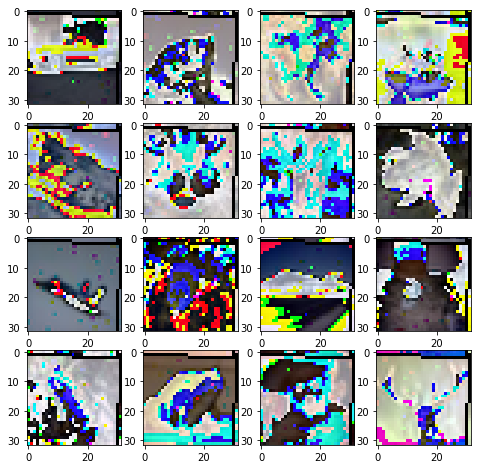

In [21]:
mod = True
## mod the images
if mod:
    Train_X_Gen.add_noise(portion = .01, amplitude = .04)
    Train_X_Gen.rotate(angle = -2)
    Train_X_Gen.translate(shift_height=2, shift_width= -1 )

## Looks funny because mean was subtracted
Train_X_Gen.show()

In [22]:
from ecbm4040.neuralnets.cnn import my_training_task4
tf.reset_default_graph()

## Training the altered images using parameter ranges that worked well in Task 3. 

kernel_sizes = [2, 5 ,10, 15]
l2_penalties = [.00001, .0001 ]
learning_rates = [.001, .0001]
batch_sizes    = [50, 75, 150, 250, 350]
pooling_size   = [ 2, 5 , 12 ]
conv_features  = [  6 , 16, 32, 64]
fc_units       = [64, 128 ,256, 512, 1024]

tune_results = list()
tune_parameters = list()

for i in range(5):
    
    tf.reset_default_graph()
    k = np.random.choice(kernel_sizes, size = (2))
    l = np.random.choice(l2_penalties)
    r = np.random.choice(learning_rates)
    b = np.random.choice(batch_sizes)
    p = np.random.choice(pooling_size, size = (2))
    f = np.random.choice(conv_features, size = (2))
    u = np.random.choice(fc_units, size=(2))
    print('iteration ' + str(i) + ': \n')
    print('kernel size: ' + str(k)+ '\n')
    print('penalty: ' + str(l)+ '\n')
    print('learning rate: ' + str(r)+ '\n')
    print('batch size: ' + str(b)+ '\n')


    result , cache = my_training_task4(Train_X_Gen, X_val, y_val, 
             conv_featmap= f,
             fc_units= u,
             conv_kernel_size= k,
             pooling_size=p,
             l2_norm= l,
             seed=235,
             use_adam = True,
             learning_rate= r,
             epoch=20,
             batch_size=b,
             verbose=False,
             pre_trained_model=None)
    
    tune_results.append(result)
    tune_parameters.append(cache)

iteration 0: 

kernel size: [10 10]

penalty: 1e-05

learning rate: 0.0001

batch size: 250

Building my LeNet. Parameters: 
conv_featmap=[64 64]
fc_units=[256 512]
conv_kernel_size=[10 10]
pooling_size=[ 2 12]
l2_norm=1e-05
seed=235
learning_rate=0.0001
number of batches for training: 196
epoch 1 
Best validation accuracy! iteration:100 accuracy: 35.7%
epoch 2 
Best validation accuracy! iteration:200 accuracy: 42.4%
Best validation accuracy! iteration:300 accuracy: 44.9%
epoch 3 
Best validation accuracy! iteration:400 accuracy: 48.0%
epoch 4 
Best validation accuracy! iteration:600 accuracy: 49.0%
Best validation accuracy! iteration:700 accuracy: 50.9%
epoch 5 
Best validation accuracy! iteration:900 accuracy: 52.4%
epoch 6 
Best validation accuracy! iteration:1000 accuracy: 52.5%
Best validation accuracy! iteration:1100 accuracy: 55.0%
epoch 7 
Best validation accuracy! iteration:1300 accuracy: 56.3%
epoch 8 
Best validation accuracy! iteration:1500 accuracy: 57.0%
epoch 9 
Best val

In [23]:
tune_results

[59.799999999999997, 58.100000000000001, 64.0, 48.5, 52.399999999999999]

## Analysis

I don't see a big change in model performance when the images are altered, but the rate of convergence does seem to speed up marginally. One thing to note is I am swapping the original unaltered training set for an entirely modified dataset, so the network never sees comingled training examples of altered and unaltered images at the same time. I imagine doing so would possibly improve validation performance by avoiding overfitting the network to either one or the other set of images. 